In [88]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [89]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [90]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [91]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [92]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [93]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [94]:
# Save references to each table
measurement_ref = Base.classes.measurement
station_ref = Base.classes.station

In [95]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [138]:
first_row = session.query(measurement_ref).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1550dcdf0>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [62]:
# Find the most recent date in the data set.
#('2017-08-23',)
#use measurement_ref since it has date
#first_row = session.query(measurement_ref).first()
#first_row.__dict__
#first row is oldest, we need last row
session.query(measurement_ref.date).order_by(measurement_ref.date.desc()).first()

('2017-08-23',)

In [113]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#we know the latest date so lets work backwards
# Calculate the date one year from the last date in data set.
last_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
#we have date range, find precipitation
percipitty_data = session.query(measurement_ref.date, measurement_ref.prcp).\
    filter(measurement_ref.date >= last_year_date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
percipitty_df = pd.DataFrame(percipitty_data, columns=['Date', 'Percipitation'])
# Sort the dataframe by date
#already sorted? ...i see why, charts do not lookalike.
percipitty_df = percipitty_df.sort_values('Date', ascending=True)
percipitty_df

,Date,Percipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0, 0.5, 'Inches')

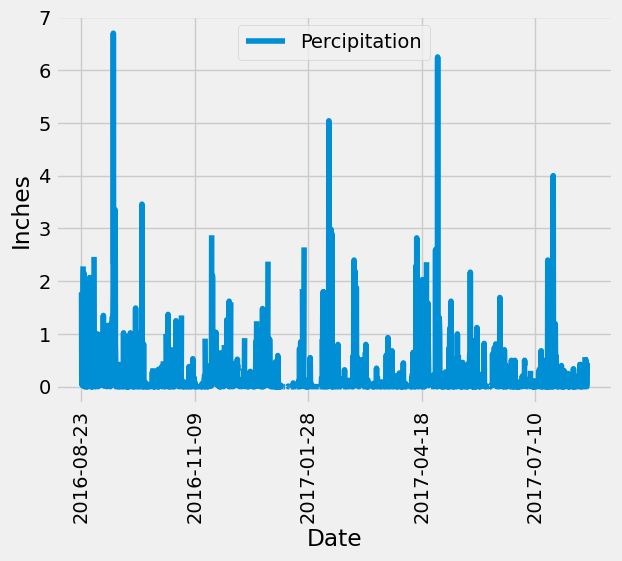

In [114]:
# Use Pandas Plotting with Matplotlib to plot the data
percipitty_df.plot(x='Date', y='Percipitation', rot=90) #suggested by BCS
plt.xlabel("Date")
plt.ylabel("Inches")

In [115]:
# Use Pandas to calculate the summary statistics for the precipitation data
percipitty_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [124]:
# Design a query to calculate the total number of stations in the dataset
station_total = session.query(station_ref.station).count()
station_total

9

In [137]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement_ref.station, func.count(measurement_ref.station)).\
    group_by(measurement_ref.station).\
    order_by(func.count(measurement_ref.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [144]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement_ref.tobs), func.max(measurement_ref.tobs), func.avg(measurement_ref.tobs)).\ #use 'avg' not 'mean'
    filter(measurement_ref.station == 'USC00519281').all()#dont forget '' 

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

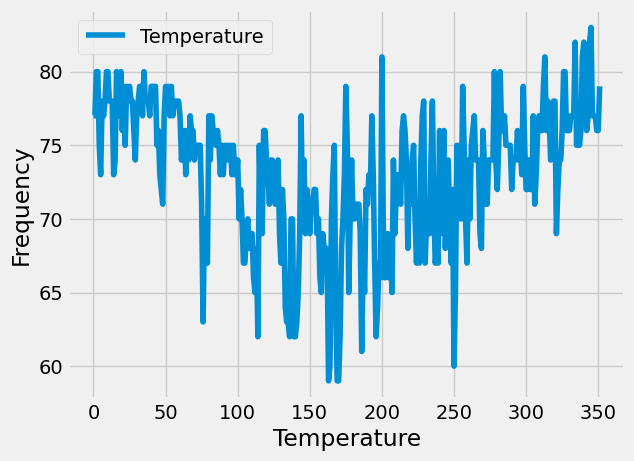

In [154]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#we have date range, find tobs
temp_data = session.query(measurement_ref.tobs).\
    filter(measurement_ref.station == 'USC00519281').\
    filter(measurement_ref.date >= last_year_date).all() #do not need date, so we add another filter!
# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_df = pd.DataFrame(temp_data, columns=['Temperature'])
# Use Pandas Plotting with Matplotlib to plot the data
temp_df.plot.hist()
plt.xlabel("Temperature")
plt.ylabel("Frequency") #ahh how many times we see the same temp...

# Close Session

In [16]:
# Close Session
session.close()